<a href="https://colab.research.google.com/github/Henry-Medeiros/programming-challenge-3-NewMKE/blob/main/Copy_of_Programming_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2020-11-23 21:55:40--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/organisms.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159777 (156K) [image/jpeg]
Saving to: ‘organisms.jpg.1’

organisms.jpg.1     100%[===================>] 156.03K  --.-KB/s    in 0.02s   

2020-11-23 21:55:40 (6.72 MB/s) - ‘organisms.jpg.1’ saved [159777/159777]



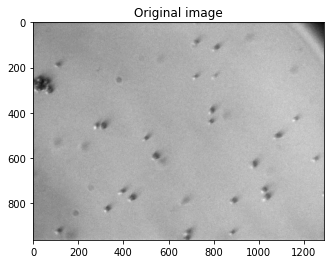

In [25]:
# The image below corresponds to a snapshot of single cell organisms observed with a microscope
import cv2
import matplotlib.pyplot as plt

!wget "https://raw.githubusercontent.com/Henry-Medeiros/images/master/organisms.jpg"
img = cv2.imread('organisms.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY, 0) 

# visualization only
plt.imshow(img, 'gray')
plt.title('Original image')
plt.show()

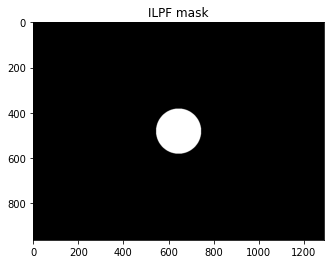

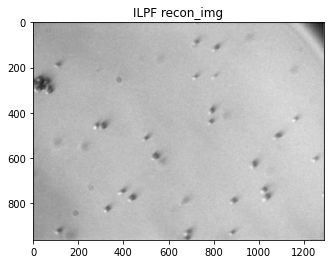

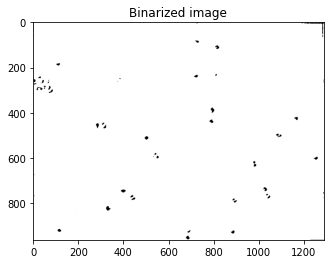

In [76]:
# Binarize the image to separate the organisms from the background
# Hint 1: You may need to remove some high-frequency noise from the image 
# before thresholding
# Hint 2: The background illumination in the image varies significantly, so a 
# single treshold for the entire will not work

# for removing the high-frequency noise of the image:
import matplotlib.pyplot as plt
import cv2
dims = img.shape
# d0 = 20
d0 = 100

# calculate xv,yv
x = range(dims[1])
y = range(dims[0])
xv,yv = np.meshgrid(x,y)


# calculate duv
duv=np.linalg.norm([xv-dims[1]/2,yv-dims[0]/2],axis = 0)
# ilpf_mask
ilpf_mask = duv<d0
plt.imshow(255.0*ilpf_mask,'gray')
plt.title('ILPF mask')
plt.show()

# ifft and ifft_shift
I_fft = np.fft.fft2(img)
I_fft_shift = np.fft.fftshift(I_fft)

# convolutiohn
filt_fft_img_ilpf = ilpf_mask*I_fft_shift

# recon
recon_img_ilpf = np.fft.ifft2(filt_fft_img_ilpf)
recon_img_ilpf = abs(recon_img_ilpf)
plt.imshow(recon_img_ilpf,'gray')
plt.title('ILPF recon_img')
plt.show()
# do the normolization for the thresholding
recon_img_ilpf = (recon_img_ilpf/np.max(recon_img_ilpf)*255).astype('uint8')

# for finding the thresholding
import numpy as np
from skimage.filters.thresholding import threshold_otsu
from skimage.filters import threshold_local

thresh = cv2.adaptiveThreshold(recon_img_ilpf,recon_img_ilpf.max(), cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,21,10)

# binarized image
plt.imshow(thresh, 'gray')
plt.title('Binarized image')
plt.show()
# print('Binarized image')
# print(img_Otsu)

img_open:
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


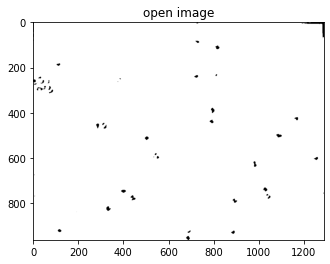

img_close:
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


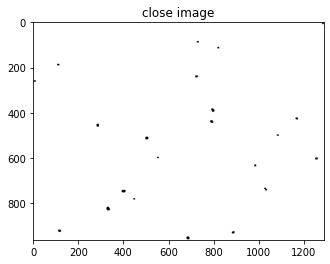

In [79]:
# Locate and plot the organisms present in the image
# Hint 3: You will need to apply a morphological filter to your binarized image 
# to remove spurious pixels left over by the binarization step
# morphological filter to close the objects


# Opening using the structuring element 
S = np.ones((6, 8), np.uint8)
img_open = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, S)
print('img_open:')
print(img_open)
plt.title('open image')
plt.imshow(255*img_open,'gray')
plt.show()

# Closing using the structuring element
S = np.ones((6, 8), np.uint8)
img_close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, S)
print('img_close:')
print(img_close)
plt.title('close image')
plt.imshow(255*img_close,'gray')
plt.show()

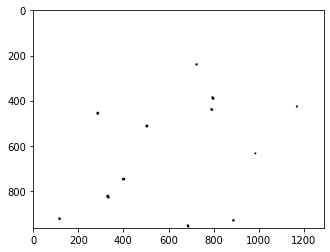

Centroid =(481.32036778413527, 643.5651814569451)
Bounding box =(0, 0, 964, 1288)


In [78]:
# Count the the number of organisms present in the image and compute their 
# average area in pixels
from skimage.morphology import label
img_labels = label(img_close)
plt.imshow(img_labels,'gray')
plt.show()

from skimage.measure import regionprops
img_props = regionprops(img_labels)
for i in img_props:
  print('Centroid ={}'.format(i.centroid))
  print('Bounding box ={}'.format(i.bbox))